<font color='blue' size=5>План:  
- Nu-SVC
- SVR
- Nu-SVR

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC, NuSVC, SVR, NuSVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


# NuSVC

Параметр $\nu$ в <font color='green'>**Nu-Support Vector Classification (Nu-SVC)**

определяет баланс между сложностью модели и точностью, по сути он осуществляет  контроль над числом опорных векторов и ошибками на обучающей выборке.

Когда $\nu = 0.5$, это означает следующее:

1. Параметр $\nu = 0.5$ устанавливает, что не более 50% обучающих данных могут быть ошибочно классифицированы или находиться внутри полосы. Другими словами, модель допускает, что до половины обучающих точек могут быть либо неправильно классифицированы, либо лежать внутри полосы.

2. Также параметр $\nu = 0.5$ также устанавливает, что как минимум 50% обучающих данных должны быть опорными векторами. Это означает, что половина всех обучающих точек будут влиять на формирование разделяющей гиперплоскости.

In [27]:
# Создание двумерных данных для классификации
X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)
# Добавление выбросов
np.random.seed(42)
n_outliers = 10
outliers = np.random.uniform(low=-6, high=6, size=(n_outliers, 2)) # выбросы
X_with_outliers = np.vstack([X, outliers])
y_with_outliers = np.hstack([y, [1]*n_outliers])  # Классифицируем выбросы как -1

In [28]:
np.unique(y_with_outliers)

array([0, 1])

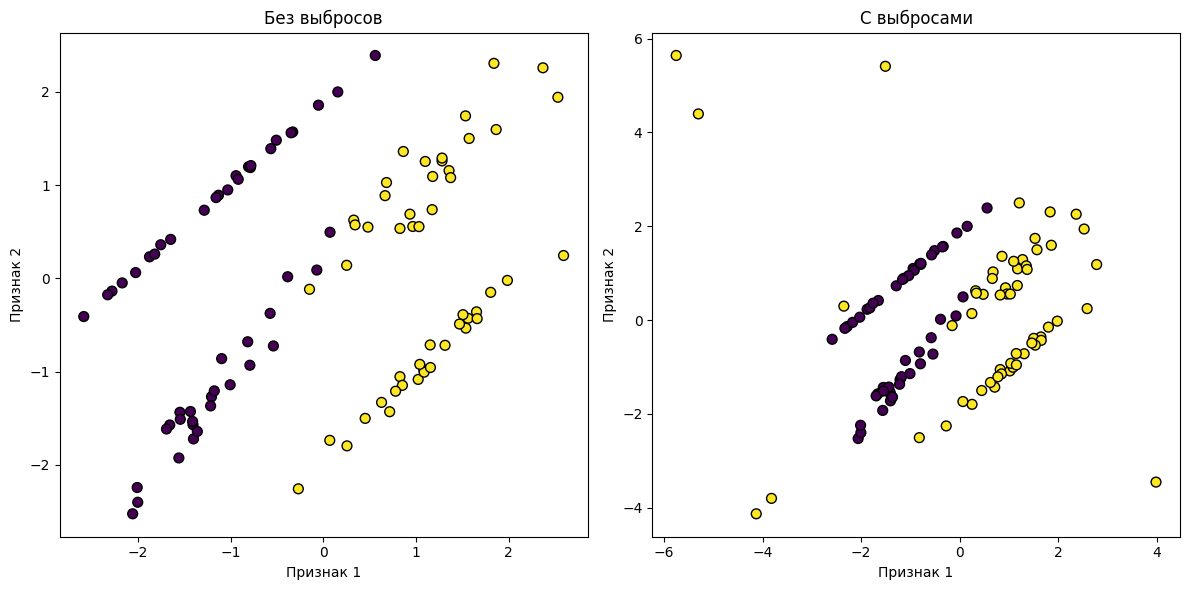

In [5]:
# Построение графиков
plt.figure(figsize=(12, 6))

# График без выбросов
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title("Без выбросов")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")

# График с выбросами
plt.subplot(1, 2, 2)
plt.scatter(X_with_outliers[:, 0], X_with_outliers[:, 1], c=y_with_outliers, cmap='viridis', edgecolor='k', s=50)
plt.title("С выбросами")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")

plt.tight_layout()
plt.show()

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_with_outliers, y_with_outliers, test_size=0.3, random_state=42)


In [30]:
# Создание модели NuSVC с nu=0.5
clf_nusvc = NuSVC(nu=0.5, kernel='rbf')

# Обучение модели на обучающих данных
clf_nusvc.fit(X_train, y_train)



NuSVC()

In [31]:
# Прогнозирование на новых данных
predictions = clf_nusvc.predict(X_test)
predictions_train = clf_nusvc.predict(X_train)


In [32]:
from sklearn.metrics import root_mean_squared_error, r2_score

print("Test RMSE = %.4f" % root_mean_squared_error(y_test, predictions))
print("Train RMSE = %.4f" % root_mean_squared_error(y_train, predictions_train))
print("R^2 = %.4f" % r2_score(y_train, predictions_train))
print("R^2 = %.4f" % r2_score(y_test, predictions))

Test RMSE = 0.3482
Train RMSE = 0.2279
R^2 = 0.7840
R^2 = 0.5038


# SVR

svm_regressor c epsilon = 1 и коэффициентам = [[-0.29596472]], [0.85582894]
svm_regressor c epsilon = 2 и коэффициентам = [[0.]], [0.23137417]
линейная регрессия с коэффициентам = [-0.36292135], 1.001755740136677


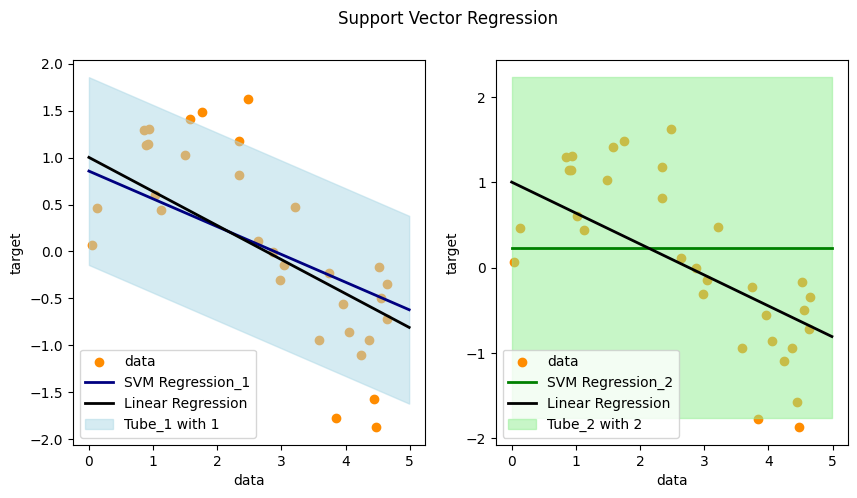

In [33]:
# Создаем синтетические данные
np.random.seed(12345)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()  # Истинная зависимость

# Добавление шума к данным
y += 0.5 * np.random.randn(len(y))

# train_size=0.6 - т.к. данные синтетические
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6)

# Задаем параметры epsilon
epsilon_1 = 1
epsilon_2 = 2

# Обучаем SVM для регрессии
svm_regressor_1 = SVR(kernel='linear', C=1.0, epsilon=epsilon_1) # epsilon - точность
svm_regressor_1.fit(X_train, y_train)

svm_regressor_2 = SVR(kernel='linear', C=1.0, epsilon=epsilon_2)
svm_regressor_2.fit(X_train, y_train)

# обучим линейную регрессию
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Создаем тестовые данные для предсказания
X_new = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]


# Получаем предсказания
y_pred_1 = svm_regressor_1.predict(X_new)
y_pred_2 = svm_regressor_2.predict(X_new)
y_pred_lin = lin_model.predict(X_new)


# Выводим коэффициенты
print(f'svm_regressor c epsilon = {epsilon_1} и коэффициентам = {svm_regressor_1.coef_}, {svm_regressor_1.intercept_}')
print(f'svm_regressor c epsilon = {epsilon_2} и коэффициентам = {svm_regressor_2.coef_}, {svm_regressor_2.intercept_}')
print(f'линейная регрессия с коэффициентам = {lin_model.coef_}, {lin_model.intercept_}')

fig = plt.figure(figsize=(10,5))
# Визуализируем результаты
plt.subplot(1,2,1)
plt.scatter(X_test, y_test, color='darkorange', label='data')
plt.plot(X_new, y_pred_1, color='navy', lw=2, label='SVM Regression_1')
plt.plot(X_new, y_pred_lin, color='black', lw=2, label='Linear Regression')
# Отрисовка трубки
plt.fill_between(X_new.ravel(),
                 y_pred_1 - svm_regressor_1.epsilon,
                 y_pred_1 + svm_regressor_1.epsilon,
                 color='lightblue', alpha=0.5, label=f'Tube_1 with {epsilon_1}')
plt.legend(loc='lower left')
plt.xlabel('data')
plt.ylabel('target')
plt.subplot(1,2,2)
plt.scatter(X_test, y_test, color='darkorange', label='data')
plt.plot(X_new, y_pred_2, color='green', lw=2, label='SVM Regression_2')
plt.plot(X_new, y_pred_lin, color='black', lw=2, label='Linear Regression')
# Отрисовка трубки
plt.fill_between(X_new.ravel(),
                 y_pred_2 - svm_regressor_2.epsilon,
                 y_pred_2 + svm_regressor_2.epsilon,
                 color='lightgreen', alpha=0.5, label=f'Tube_2 with {epsilon_2}')

plt.xlabel('data')
plt.ylabel('target')
plt.suptitle('Support Vector Regression')
plt.legend(loc='lower left')
plt.show()


Если значение `epsilon` в методе опорных векторов для задачи регрессии (SVR) выбрано слишком большим, это будет означать, что модель **станет более толерантной к ошибкам** и допустит большие отклонения между предсказанными значениями и истинными целевыми значениями.



**HuberRegressor** — это метод машинного обучения, используемый для решения задач регрессии, который является модификацией метода наименьших квадратов. 

*Основные характеристики*

**Потеря Хубера:** HuberRegressor использует комбинированную функцию потерь, которая применяет квадратную ошибку для остатков, меньших определенного порога (параметр ϵ), и абсолютную ошибку для остатков, превышающих этот порог. Это позволяет ему быть менее чувствительным к выбросам по сравнению с обычной линейной регрессией

*Huber параметры*

epsilon: Определяет порог для классификации остатков как выбросов. Чем меньше значение, тем более устойчивым становится регрессор к выбросам.

max_iter: Максимальное количество итераций для оптимизации.

alpha: Параметр регуляризации (L2).

fit_intercept: Указывает, нужно ли вычислять свободный член модели.

tol: Допустимая ошибка для остановки алгоритма

In [10]:
import numpy as np
import plotly.graph_objects as go
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.model_selection import GridSearchCV

# Создание искусственных данных
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()  # Истинная зависимость

# Добавление шума к данным
y += 0.5 * np.random.randn(len(y))
y[10] = 40
y[11] = 35
y[30] = 35
y[14] = 40
y[12] = 35
y[31] = 35




# Обучение SVR с линейным ядром и трубкой (epsilon=0.1)
# Определение сетки гиперпараметров для SVR
param_grid = {
    'C': [0.1, 1, 10, 100, 1000], # влияет на регуляризацию
    'epsilon': [0.01, 0.1, 1, 10], # влияет на margin и штрафную функцию
    'kernel': ['linear'] # ядро алгоритма
}

# Создание модели SVR
svr = SVR()

# Настройка GridSearchCV
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Обучение моделей с подбором гиперпараметров
grid_search.fit(X, y)

# Вывод лучших параметров и наименьшей ошибки
print("Лучшие параметры: ", grid_search.best_params_)
print("Наименьшая ошибка: ", -grid_search.best_score_)

# Обучение модели с лучшими параметрами
svr_linear = grid_search.best_estimator_
svr_linear.fit(X, y)


# Обучение линейной регрессии
lin_model = LinearRegression()
lin_model.fit(X, y)

# Обучение Huber регрессии
huber_model = HuberRegressor()
huber_model.fit(X, y)

# Создание сетки для построения графика
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

# Предсказание для сетки
y_pred_svr = svr_linear.predict(X_test)
y_pred_lin = lin_model.predict(X_test)
y_pred_huber = huber_model.predict(X_test)

# Построение графика с Plotly
fig = go.Figure()

# Добавление данных
fig.add_trace(go.Scatter(x=X.ravel(), y=y, mode='markers', name='Данные', marker=dict(color='darkorange')))
fig.add_trace(go.Scatter(x=X_test.ravel(), y=y_pred_lin, mode='lines', name='Линейная регрессия', line=dict(color='green')))
fig.add_trace(go.Scatter(x=X_test.ravel(), y=y_pred_svr, mode='lines', name='SVR (Линейное ядро)', line=dict(color='navy')))
fig.add_trace(go.Scatter(x=X_test.ravel(), y=y_pred_huber, mode='lines', name='Huber регрессия', line=dict(color='red')))

# Настройки графика
fig.update_layout(
    title='Сравнение моделей регрессии',
    xaxis_title='Данные',
    yaxis_title='Целевые значения',
    legend=dict(x=5, y=1),
)

fig.show()


Лучшие параметры:  {'C': 1000, 'epsilon': 0.01, 'kernel': 'linear'}
Наименьшая ошибка:  94.65535243469643


При малых количествах выбросов SVR более устойчив

In [37]:
y_pred_lin[:3]# метод linearReg, веса, коэффициенты перед x

array([1.00175574, 0.99812653, 0.99449731])

In [35]:
y_pred_svr[:3]# метод SVR, веса, коэффициенты перед x


array([1.50181301, 1.49687019, 1.49192737])

In [36]:
y_pred_huber[:3] # метод Хуберы, веса, коэффициенты перед x

array([1.48606115, 1.48099918, 1.47593721])

In [49]:
# Создание модели NuSVR с nu=0.5
clf_nusvc = NuSVR(nu=0.4, kernel='rbf')

# Обучение модели на обучающих данных
clf_nusvc.fit(X, y)

# Прогнозирование на новых данных
predictions = clf_nusvc.predict(X_test)


In [50]:
predictions[:3] # метод Хуберы, веса, коэффициенты перед x

array([1.0238156 , 0.12866485, 0.59521124])